# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

This is the jupyter notebook that goes with this documentation: [http://pandas.pydata.org/pandas-docs/stable/10min.html](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [5]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,1.036102,2.131338,1.675803,0.048036
2014-01-02,0.987610,0.143419,-0.343320,1.592530
2014-01-03,-0.639641,0.149937,-0.129164,-0.378923
2014-01-04,-1.696538,-0.367535,0.698776,-0.240190
2014-01-05,-0.288731,0.277990,1.877462,0.759018
2014-01-06,0.912583,0.538632,1.517813,1.830544


In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [7]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [8]:
df.head() #print the first five rows

,A,B,C,D
2014-01-01,1.036102,2.131338,1.675803,0.048036
2014-01-02,0.987610,0.143419,-0.343320,1.592530
2014-01-03,-0.639641,0.149937,-0.129164,-0.378923
2014-01-04,-1.696538,-0.367535,0.698776,-0.240190
2014-01-05,-0.288731,0.277990,1.877462,0.759018


In [9]:
df.tail() #print the last five rows

,A,B,C,D
2014-01-02,0.987610,0.143419,-0.343320,1.592530
2014-01-03,-0.639641,0.149937,-0.129164,-0.378923
2014-01-04,-1.696538,-0.367535,0.698776,-0.240190
2014-01-05,-0.288731,0.277990,1.877462,0.759018
2014-01-06,0.912583,0.538632,1.517813,1.830544


In [10]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.483955,-0.440825,-0.302737,-0.155358
std,1.720002,1.145611,1.288744,0.778234
min,-2.591969,-1.774950,-2.132512,-0.961632
25%,-1.680700,-1.373639,-1.159716,-0.703987
50%,-0.612568,-0.381445,-0.144168,-0.400085
75%,0.539589,0.228407,0.720962,0.406341
max,2.026475,1.165570,1.093316,0.959791


In [13]:
df.sort_values(by='B')

,A,B,C,D
2014-01-04,-1.696538,-0.367535,0.698776,-0.240190
2014-01-02,0.987610,0.143419,-0.343320,1.592530
2014-01-03,-0.639641,0.149937,-0.129164,-0.378923
2014-01-05,-0.288731,0.277990,1.877462,0.759018
2014-01-06,0.912583,0.538632,1.517813,1.830544
2014-01-01,1.036102,2.131338,1.675803,0.048036


### Selection

In [14]:
df[['A','B']]

,A,B
2014-01-01,1.036102,2.131338
2014-01-02,0.987610,0.143419
2014-01-03,-0.639641,0.149937
2014-01-04,-1.696538,-0.367535
2014-01-05,-0.288731,0.277990
2014-01-06,0.912583,0.538632


In [15]:
df[0:3]

,A,B,C,D
2014-01-01,2.026475,-1.540563,-0.287327,0.959791
2014-01-02,-2.591969,0.109976,0.961619,0.625885
2014-01-03,0.721453,-1.774950,-0.001008,-0.756023


In [16]:
# By label
df.loc[dates[0]]

A    2.026475
B   -1.540563
C   -0.287327
D    0.959791
Name: 2014-01-01 00:00:00, dtype: float64

In [17]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,2.026475,-1.540563
2014-01-02,-2.591969,0.109976
2014-01-03,0.721453,-1.774950
2014-01-04,-1.834555,-0.872866
2014-01-05,-1.219135,0.267884
2014-01-06,-0.006001,1.165570


In [18]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,0.109976
2014-01-03,-1.774950
2014-01-04,-0.872866


In [19]:
# Fast access to scalar
df.at[dates[1],'B']

0.10997605659469746

In [20]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,-1.834555,-0.872866,-1.450512,-0.252293
2014-01-05,-1.219135,0.267884,-2.132512,-0.961632
2014-01-06,-0.006001,1.165570,1.093316,-0.547878


### Boolean Indexing

In [21]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-02,-2.591969,0.109976,0.961619,0.625885
2014-01-04,-1.834555,-0.872866,-1.450512,-0.252293
2014-01-05,-1.219135,0.267884,-2.132512,-0.961632
2014-01-06,-0.006001,1.165570,1.093316,-0.547878


### Setting

In [22]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [23]:
df_posA

,A,B,C,D
2014-01-01,2.026475,-1.540563,-0.287327,0.959791
2014-01-02,2.591969,-0.109976,-0.961619,-0.625885
2014-01-03,0.721453,-1.774950,-0.001008,-0.756023
2014-01-04,1.834555,0.872866,1.450512,0.252293
2014-01-05,1.219135,-0.267884,2.132512,0.961632
2014-01-06,0.006001,-1.165570,-1.093316,0.547878


In [24]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [25]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [28]:
df['F'] = s1

In [27]:
df

,A,B,C,D,F
2014-01-01,2.026475,-1.540563,-0.287327,0.959791,NaN
2014-01-02,-2.591969,0.109976,0.961619,0.625885,1.0
2014-01-03,0.721453,-1.774950,-0.001008,-0.756023,2.0
2014-01-04,-1.834555,-0.872866,-1.450512,-0.252293,3.0
2014-01-05,-1.219135,0.267884,-2.132512,-0.961632,4.0
2014-01-06,-0.006001,1.165570,1.093316,-0.547878,5.0


### Missing Data

In [29]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [30]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [31]:
df1

,A,B,C,D,F,E
2014-01-01,2.026475,-1.540563,-0.287327,0.959791,NaN,1.0
2014-01-02,-2.591969,0.109976,0.961619,0.625885,1.0,1.0
2014-01-03,0.721453,-1.774950,-0.001008,-0.756023,2.0,NaN
2014-01-04,-1.834555,-0.872866,-1.450512,-0.252293,3.0,NaN


In [32]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [33]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,-0.483955,-0.440825,-0.302737,-0.155358,3.000000
std,1.720002,1.145611,1.288744,0.778234,1.581139
min,-2.591969,-1.774950,-2.132512,-0.961632,1.000000
25%,-1.680700,-1.373639,-1.159716,-0.703987,2.000000
50%,-0.612568,-0.381445,-0.144168,-0.400085,3.000000
75%,0.539589,0.228407,0.720962,0.406341,4.000000
max,2.026475,1.165570,1.093316,0.959791,5.000000


In [34]:
df.mean(),df.mean(1) # Operation on two different axes

(A   -0.483955
 B   -0.440825
 C   -0.302737
 D   -0.155358
 F    3.000000
 dtype: float64, 2014-01-01    0.289594
 2014-01-02    0.021102
 2014-01-03    0.037894
 2014-01-04   -0.282045
 2014-01-05   -0.009079
 2014-01-06    1.341002
 Freq: D, dtype: float64)

### Applying functions

In [39]:
df

,A,B,C,D,F
2014-01-01,2.026475,-1.540563,-0.287327,0.959791,NaN
2014-01-02,-2.591969,0.109976,0.961619,0.625885,1.0
2014-01-03,0.721453,-1.774950,-0.001008,-0.756023,2.0
2014-01-04,-1.834555,-0.872866,-1.450512,-0.252293,3.0
2014-01-05,-1.219135,0.267884,-2.132512,-0.961632,4.0
2014-01-06,-0.006001,1.165570,1.093316,-0.547878,5.0


In [40]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,2.026475,-1.540563,-0.287327,0.959791,NaN
2014-01-02,-0.565494,-1.430587,0.674291,1.585676,1.0
2014-01-03,0.155959,-3.205537,0.673283,0.829653,3.0
2014-01-04,-1.678596,-4.078403,-0.777229,0.577361,6.0
2014-01-05,-2.897730,-3.810519,-2.909741,-0.384271,10.0
2014-01-06,-2.903731,-2.644949,-1.816425,-0.932149,15.0


In [37]:
df.apply(lambda x: x.max() - x.min())

A    4.618444
B    2.940520
C    3.225829
D    1.921423
F    4.000000
dtype: float64

In [41]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [42]:
np.random.randn(10,4)

array([[-0.03046252, -0.60108237,  0.44103234, -0.32482173],
       [ 0.7241084 ,  0.66786319, -0.33489557,  0.62533177],
       [ 1.88883059,  0.44654071, -1.02847687,  0.59437753],
       [ 0.49880818,  0.04392406, -1.3055819 , -0.25889446],
       [ 0.76842241, -0.63682163, -0.52206508, -1.09185279],
       [-0.32667174,  0.02361338,  0.96981337, -0.84480472],
       [-1.64880405,  1.29278266,  0.54204784,  0.29456127],
       [ 0.82484122, -0.69252507, -1.22627977,  0.08100629],
       [-2.29865392,  0.48331901, -1.3072828 , -0.28314556],
       [-0.56267582, -0.96843424, -1.5578729 ,  0.40825941]])

In [43]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.141552,0.026084,0.163059,1.252816
1,1.748101,0.157318,0.673082,-0.774367
2,1.023912,-0.707897,0.348124,0.677650
3,0.391844,-0.093174,-0.712555,1.107597
4,0.672249,-0.435652,1.336065,-1.016853
5,-0.716613,-1.074978,0.187958,0.736168
6,0.685067,-0.649943,-0.689461,-0.450059
7,-0.160532,1.391091,-1.856466,0.244401
8,1.185351,0.174947,2.041815,-0.394828
9,-0.804092,1.688648,-0.617875,-0.600195


In [44]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -1.141552  0.026084  0.163059  1.252816
 1  1.748101  0.157318  0.673082 -0.774367
 2  1.023912 -0.707897  0.348124  0.677650,
           0         1         2         3
 3  0.391844 -0.093174 -0.712555  1.107597
 4  0.672249 -0.435652  1.336065 -1.016853
 5 -0.716613 -1.074978  0.187958  0.736168
 6  0.685067 -0.649943 -0.689461 -0.450059,
           0         1         2         3
 7 -0.160532  1.391091 -1.856466  0.244401
 8  1.185351  0.174947  2.041815 -0.394828
 9 -0.804092  1.688648 -0.617875 -0.600195]

In [45]:
pd.concat(pieces)

,0,1,2,3
0,-1.141552,0.026084,0.163059,1.252816
1,1.748101,0.157318,0.673082,-0.774367
2,1.023912,-0.707897,0.348124,0.677650
3,0.391844,-0.093174,-0.712555,1.107597
4,0.672249,-0.435652,1.336065,-1.016853
5,-0.716613,-1.074978,0.187958,0.736168
6,0.685067,-0.649943,-0.689461,-0.450059
7,-0.160532,1.391091,-1.856466,0.244401
8,1.185351,0.174947,2.041815,-0.394828
9,-0.804092,1.688648,-0.617875,-0.600195


In [46]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,-1.141552,0.026084,0.163059,1.252816
1,1.748101,0.157318,0.673082,-0.774367
2,1.023912,-0.707897,0.348124,0.677650
3,0.391844,-0.093174,-0.712555,1.107597
4,0.672249,-0.435652,1.336065,-1.016853
5,-0.716613,-1.074978,0.187958,0.736168
6,0.685067,-0.649943,-0.689461,-0.450059
7,-0.160532,1.391091,-1.856466,0.244401
8,1.185351,0.174947,2.041815,-0.394828
9,-0.804092,1.688648,-0.617875,-0.600195


### Grouping


In [47]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [48]:
df

,A,B,C,D
0,foo,one,0.146493,1.389611
1,bar,one,-0.613367,-0.787362
2,foo,two,-1.359125,-0.179501
3,bar,three,-1.594183,0.873513
4,foo,two,-0.570038,-0.510078
5,bar,two,-1.320157,-0.968893
6,foo,one,-0.904131,0.314009
7,foo,three,0.417280,-0.132005


In [49]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.613367 -0.787362
    three -1.594183  0.873513
    two   -1.320157 -0.968893
foo one   -0.757638  1.703619
    three  0.417280 -0.132005
    two   -1.929163 -0.689579

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [50]:
a = df.groupby(['A','B']).sum()

In [51]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -0.613367 -1.594183 -1.320157 -0.787362  0.873513 -0.968893
foo -0.378819  0.417280 -0.964581  0.851810 -0.132005 -0.344789

### Time Series


In [52]:
import pandas as pd
import numpy as np

In [53]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [54]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [55]:
ts

2014-01-01 00:00:00     44
2014-01-01 00:00:01    387
2014-01-01 00:00:02    156
2014-01-01 00:00:03    392
2014-01-01 00:00:04     76
2014-01-01 00:00:05    319
2014-01-01 00:00:06    112
2014-01-01 00:00:07    218
2014-01-01 00:00:08    494
2014-01-01 00:00:09    231
2014-01-01 00:00:10    350
2014-01-01 00:00:11    469
2014-01-01 00:00:12    418
2014-01-01 00:00:13    120
2014-01-01 00:00:14    464
2014-01-01 00:00:15    179
2014-01-01 00:00:16    459
2014-01-01 00:00:17     54
2014-01-01 00:00:18    468
2014-01-01 00:00:19    170
2014-01-01 00:00:20    259
2014-01-01 00:00:21    403
2014-01-01 00:00:22     12
2014-01-01 00:00:23    105
2014-01-01 00:00:24    320
2014-01-01 00:00:25    362
2014-01-01 00:00:26    152
2014-01-01 00:00:27     42
2014-01-01 00:00:28    401
2014-01-01 00:00:29     16
                      ... 
2014-01-01 00:01:10    461
2014-01-01 00:01:11     69
2014-01-01 00:01:12    401
2014-01-01 00:01:13     51
2014-01-01 00:01:14     88
2014-01-01 00:01:15    479
2

In [56]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    250.933333
2014-01-01 00:01:00    241.125000
Freq: T, dtype: float64

In [57]:
# Many additional time series features
ts. #use tab

SyntaxError: invalid syntax (<ipython-input-57-5c9240a56f62>, line 2)

### Plotting


In [58]:
ts.plot()

In [59]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

In [61]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

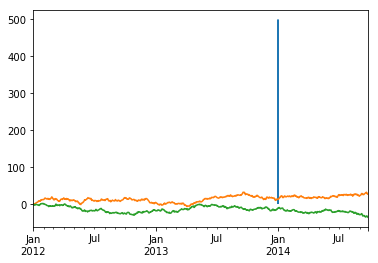

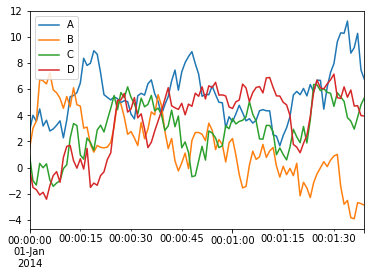

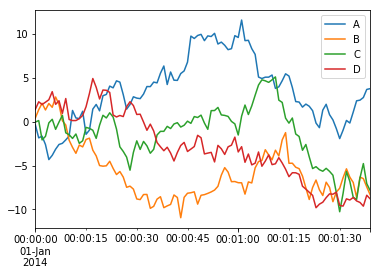

In [63]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #
plt.show()

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas